In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

health = pd.read_csv('Mental health Depression disorder Data.csv')

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_22467/300513165.py:8: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  health = pd.read_csv('Mental health Depression disorder Data.csv')


In [2]:
health.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [28]:
# builting the dataframe
    # create new df with countries we're interested in studying
    # fix the index 
    # added variable for whether it has universal healthcare or not
    
developed = health.loc[health['Entity'].isin(['United States','Japan','Argentina','Australia','United Kingdom', 'South Korea','Denmark','Canada','France','Taiwan','Uruguay','Germany','Norway','Austria','Belgium','Netherlands', 'Finland','Thailand','United Arab Emirates', 'Sweden', 'Switzerland', 'Chile', 'Costa Rica', 'Mexico', 'Ireland', 'Italy', 'Spain', 'Portugal', 'Brazil', 'Israel','Luxembourg','Singapore', 'New Zealand', 'Monaco', 'Iceland', 'Qatar', 'Jordan', 'Poland', 'Croatia', 'Greece', 'Czech Republic', 'Hungary', 'Estonia'])]
developed.head()
developed = developed.reset_index(drop=True)

developed = developed.drop('index', axis=1)

# have universal care or practically universal care (for example may be small co-pays)
developed["Universal Care"] = np.nan

developed["Universal Care"] = np.where(developed['Entity'] == 'United States', 0,1) 




In [29]:
map_names = {'Entity': 'country',
             'Year' : 'year',
             'Schizophrenia (%)':'schizo', 
             'Bipolar disorder (%)':'bipolar',
             'Eating disorders (%)' : 'eating_dis',
             'Anxiety disorders (%)' : 'anxiety',
             'Drug use disorders (%)':'drug',
             'Depression (%)':'depres',
             'Alcohol use disorders (%)':'alcohol'}

developed.rename(columns=map_names,inplace=True)



# just for years 1990 - 2017

developed = developed.loc[developed['year'].isin(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'])] 



In [30]:
# dropping NA
developed1 = developed.dropna()

len(developed1)

1036

In [31]:
# using numpy to split into 2 by 70% for training set and the remaining for the rest
developed2 = developed1.sample(frac = 1)
train,test = np.split(developed2,[int(0.80 * len(developed2))])



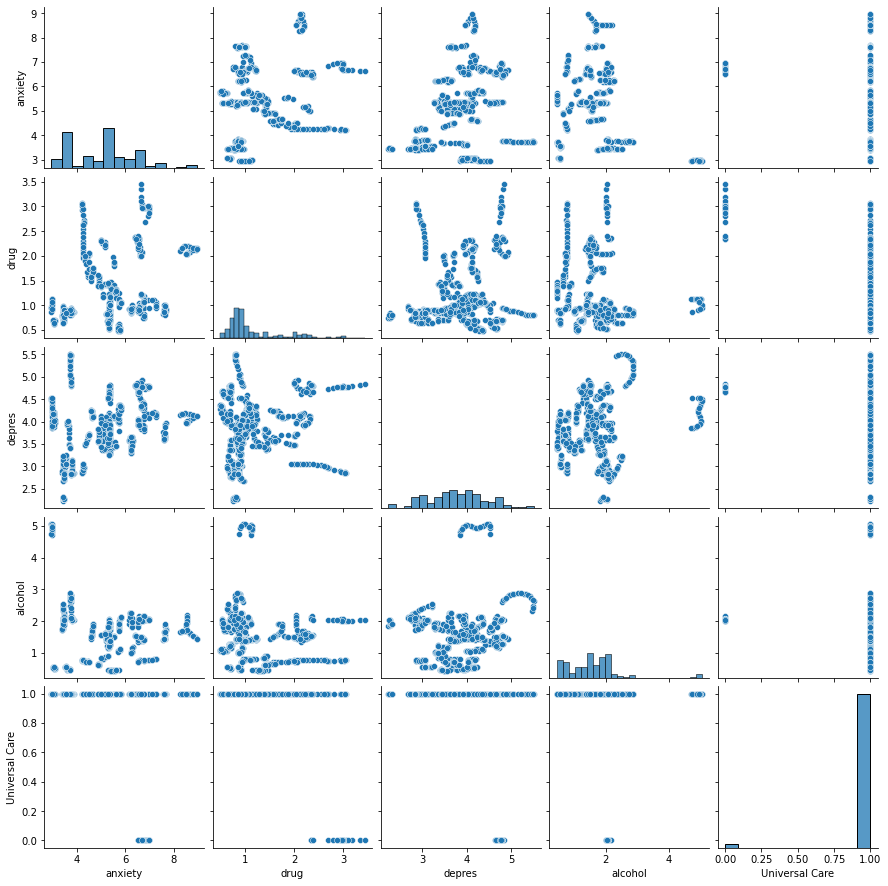

In [32]:
sns.pairplot(train)
plt.show()

In [33]:
ed_obj = smf.ols(formula = 'depres~alcohol+drug+anxiety', data = train).fit()
ed_obj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 depres   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     77.11
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           5.73e-44
Time:                        20:55:38   Log-Likelihood:                -704.28
No. Observations:                 828   AIC:                             1417.
Df Residuals:                     824   BIC:                             1435.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3673      0.096     24.761      0.000       2.180       2.555
alcohol        0.1675      0.025      6.674      0.000       0.118       0.217
drug           0.0944      0.036      2.659      0.008       0.025       0.164
anxiety        0.2020      0.015     13.108      0.000       0.172       0.232
==============================================================================
Omnibus:                       37.892   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.894
Skew:                           0.535   Prob(JB):                     8.00e-10
Kurtosis:                       3.261   Cond. No.                         28.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
ed_obj_2 = smf.ols(formula = 'depres~alcohol+drug+anxiety+alcohol*drug+ drug*anxiety + alcohol*anxiety + I(alcohol**3) + +I(alcohol**2) + I(drug**3) + I(drug**2) + I(anxiety**3) + I(anxiety**2)',
                 data = train).fit()
ed_obj_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 depres   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     62.74
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          4.08e-107
Time:                        20:57:57   Log-Likelihood:                -535.85
No. Observations:                 828   AIC:                             1098.
Df Residuals:                     815   BIC:                             1159.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.8436      1.015      3.787      0.000       1.851       5.836
alcohol            -3.3023      0.290    -11.395      0.000      -3.871      -2.733
drug               -5.7759      0.494    -11.702      0.000      -6.745      -4.807
anxiety             1.4847      0.588      2.526      0.012       0.331       2.638
alcohol:drug        0.5332      0.084      6.337      0.000       0.368       0.698
drug:anxiety        0.0799      0.039      2.054      0.040       0.004       0.156
alcohol:anxiety     0.0270      0.027      1.008      0.314      -0.026       0.080
I(alcohol ** 3)    -0.1493      0.018     -8.129      0.000      -0.185      -0.113
I(alcohol ** 2)     1.2919      0.138      9.391      0.000       1.022       1.562
I(drug ** 3)       -0.5442      0.056     -9.671      0.000      -0.655      -0.434
I(drug ** 2)        2.9234      0.300      9.759      0.000       2.335       3.511
I(anxiety ** 3)  5.392e-05      0.006      0.009      0.993      -0.012       0.012
I(anxiety ** 2)    -0.1266      0.105     -1.201      0.230      -0.333       0.080
==============================================================================
Omnibus:                       84.841   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.773
Skew:                           0.778   Prob(JB):                     4.40e-26
Kurtosis:                       3.983   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
ed_obj_3 = smf.ols(formula = 'depres~alcohol+drug+anxiety + alcohol*anxiety + drug*anxiety',
                 data = train).fit()
ed_obj_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 depres   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     46.92
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           1.02e-42
Time:                        21:05:16   Log-Likelihood:                -702.77
No. Observations:                 828   AIC:                             1418.
Df Residuals:                     822   BIC:                             1446.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.5286      0.225     11.236      0.000       2.087       2.970
alcohol             0.2349      0.089      2.645      0.008       0.061       0.409
drug               -0.1447      0.149     -0.973      0.331      -0.437       0.147
anxiety             0.1831      0.045      4.055      0.000       0.094       0.272
alcohol:anxiety    -0.0204      0.023     -0.900      0.369      -0.065       0.024
drug:anxiety        0.0433      0.026      1.663      0.097      -0.008       0.094
==============================================================================
Omnibus:                       34.684   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.951
Skew:                           0.507   Prob(JB):                     5.74e-09
Kurtosis:                       3.269   Cond. No.                         158.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
ols_object = smf.ols(formula = 'np.log(depres)~(anxiety+drug+alcohol)**2+I(anxiety**2)', data = train)
model_log = ols_object.fit()
model_log.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(depres)   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     62.03
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           1.59e-71
Time:                        21:06:19   Log-Likelihood:                 440.06
No. Observations:                 828   AIC:                            -864.1
Df Residuals:                     820   BIC:                            -826.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6025      0.082      7.388      0.000       0.442       0.763
anxiety             0.2775      0.029      9.611      0.000       0.221       0.334
drug               -0.2176      0.046     -4.684      0.000      -0.309      -0.126
alcohol            -0.0564      0.031     -1.798      0.073      -0.118       0.005
anxiety:drug        0.0037      0.010      0.356      0.722      -0.017       0.024
anxiety:alcohol    -0.0171      0.006     -2.954      0.003      -0.028      -0.006
drug:alcohol        0.1594      0.021      7.431      0.000       0.117       0.202
I(anxiety ** 2)    -0.0193      0.003     -6.307      0.000      -0.025      -0.013
==============================================================================
Omnibus:                       54.962   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.382
Skew:                           0.503   Prob(JB):                     1.75e-19
Kurtosis:                       4.221   Cond. No.                         596.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""